# DBSCAN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from datetime import datetime


In [2]:
#Data preparation
data=pd.read_csv("/workspaces/master-thesis-declustering-using-ml/Unsupervised-ML/data/mld_final-nz_real_catalog.csv")
data.head()

,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Hour,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent
0,2,1980-01-01,09:27:04.52,-40.490,174.66901,72.6,3.200,1980-01-01 09:27:04.520,0.099293,1980,...,9,27,4.52,0,0.000217,0.004731,0.045941,-0.633,0.082958,0.041479
1,3,1980-01-01,18:28:10.99,-37.630,176.38000,210.0,4.150,1980-01-01 18:28:10.990,0.475062,1980,...,18,28,10.99,1,0.001304,0.008451,0.154341,-0.950,0.124437,0.082958
2,4,1980-01-01,20:20:54.03,-40.290,173.42999,212.0,4.500,1980-01-01 20:20:54.030,0.553338,1980,...,20,20,54.03,2,0.000038,0.000571,0.066251,-0.350,0.165915,0.124437
3,5,1980-01-02,18:24:15.40,-38.480,176.75000,5.0,3.375,1980-01-02 18:24:15.400,1.472336,1980,...,18,24,15.40,2,0.000047,0.007270,0.006458,0.775,0.000000,0.124437
4,6,1980-01-04,01:21:41.06,-40.906,175.23700,24.1,2.750,1980-01-04 01:21:41.060,2.762216,1980,...,1,21,41.06,3,0.000144,0.010633,0.013547,1.750,0.041479,0.165915


In [16]:
df = data[data["magnitude"] > 4]

df.columns

Index(['event', 'date', 'Time', 'latitude', 'longitude', 'depth', 'magnitude',
       'DateTime', 'time', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'i+', 'N+', 'T+', 'R+', 'dm+', 'n_child', 'n_parent'],
      dtype='str')

In [19]:

df.describe()

,event,latitude,longitude,depth,magnitude,time,Year,Month,Day,Hour,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent
count,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,20338.000000,2.033800e+04,2.033800e+04,20338.000000,20338.000000,20338.000000,20338.000000
mean,174629.921969,-38.483198,109.306081,87.918228,4.415488,8563.437987,2002.955895,6.406677,15.283115,11.472908,29.461599,30.025282,168299.944046,1.817431e-05,6.762991e-01,0.012481,0.566547,0.468465,30.903312
std,130285.865169,3.765442,137.824852,96.847424,0.387550,4579.334018,12.518088,3.492892,8.734544,6.850806,17.314711,17.342664,128997.591931,1.235718e-04,5.220679e+00,0.292268,1.289574,6.190753,95.965102
min,3.000000,-49.165302,-180.000000,0.000000,4.000345,0.475062,1980.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,2.222721e-08,0.000000,-5.494019,0.000000,0.041479
25%,56749.250000,-40.590180,166.842229,12.000000,4.131000,4992.285196,1993.000000,3.000000,8.000000,6.000000,15.000000,14.800000,52478.750000,2.319415e-08,2.981391e-04,0.000014,-0.315953,0.041479,0.082958
50%,143418.500000,-37.711310,175.671910,33.000000,4.300000,8100.162283,2002.000000,7.000000,15.000000,12.000000,29.000000,30.100000,137769.000000,2.647431e-06,4.926126e-03,0.000116,0.357569,0.082958,0.248873
75%,307100.750000,-36.283278,177.576073,158.555450,4.587291,12896.856683,2015.000000,9.000000,22.000000,17.000000,44.000000,45.210000,297813.500000,1.397335e-05,7.192134e-02,0.001078,1.354289,0.248873,2.862040
max,396252.000000,-32.287106,180.638540,750.000000,7.820380,16435.980773,2024.000000,12.000000,31.000000,23.000000,59.000000,59.990000,396166.000000,1.173024e-02,2.761215e+02,39.311853,3.818550,553.825475,553.825475


## Convert DateTime to Numerical Time

In [20]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Convert to seconds from first event
df['time_seconds'] = (
    df['DateTime'] - df['DateTime'].min()
).dt.total_seconds()
df

,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent,time_seconds
1,3,1980-01-01,18:28:10.99,-37.630000,176.380000,210.000000,4.150000,1980-01-01 18:28:10.990,0.475062,1980,...,28,10.99,1,0.001304,0.008451,1.543406e-01,-0.950000,0.124437,0.082958,0.000000e+00
2,4,1980-01-01,20:20:54.03,-40.290000,173.429990,212.000000,4.500000,1980-01-01 20:20:54.030,0.553338,1980,...,20,54.03,2,0.000038,0.000571,6.625140e-02,-0.350000,0.165915,0.124437,6.763040e+03
5,7,1980-01-04,01:28:26.60,-36.660000,177.450000,221.000000,4.818000,1980-01-04 01:28:26.600,2.766910,1980,...,28,26.60,5,0.000085,0.000180,4.699059e-01,-2.068000,0.497746,0.041479,1.980156e+05
6,8,1980-01-04,02:29:14.64,-38.710000,175.940000,138.000000,4.011000,1980-01-04 02:29:14.640,2.809132,1980,...,29,14.64,6,0.000002,0.000139,1.472751e-02,0.807000,0.082958,0.497746,2.016636e+05
18,20,1980-01-07,06:34:12.41,-38.690000,175.830000,136.000000,4.743000,1980-01-07 06:34:12.410,5.979245,1980,...,34,12.41,7,0.000007,0.027253,2.581446e-04,-0.732000,0.497746,0.082958,4.755614e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396129,396131,2024-12-25,16:09:52.77,-34.472298,-177.857788,33.000000,5.021488,2024-12-25 16:09:52.770,16430.379018,2024,...,9,52.77,396120,0.000017,0.004428,3.757938e-03,-1.316746,0.041479,0.041479,1.419544e+09
396166,396168,2024-12-27,16:35:42.03,-34.719337,179.310410,187.648285,4.109444,2024-12-27 16:35:42.030,16432.396949,2024,...,35,42.03,396166,0.000028,0.000054,5.218299e-01,-0.985411,0.082958,0.124437,1.419718e+09
396218,396220,2024-12-30,01:55:43.19,-33.308575,-178.069946,33.000000,4.180266,2024-12-30 01:55:43.190,16434.785852,2024,...,55,43.19,394573,0.000004,0.045409,8.310616e-05,2.154414,0.041479,2.281336,1.419924e+09
396239,396241,2024-12-30,21:33:10.43,-34.700241,-179.822449,100.000000,4.070995,2024-12-30 21:33:10.430,16435.603528,2024,...,33,10.43,301612,0.000029,1.649382,1.777235e-05,2.442542,0.041479,3.608659,1.419995e+09


## Select Features for Clustering

In [21]:
features=df[["R+","T+","magnitude","depth"]].copy()
features

,R+,T+,magnitude,depth
1,1.543406e-01,0.008451,4.150000,210.000000
2,6.625140e-02,0.000571,4.500000,212.000000
5,4.699059e-01,0.000180,4.818000,221.000000
6,1.472751e-02,0.000139,4.011000,138.000000
18,2.581446e-04,0.027253,4.743000,136.000000
...,...,...,...,...
396129,3.757938e-03,0.004428,5.021488,33.000000
396166,5.218299e-01,0.000054,4.109444,187.648285
396218,8.310616e-05,0.045409,4.180266,33.000000
396239,1.777235e-05,1.649382,4.070995,100.000000


### Handle Missing / Infinite Values

In [22]:
features=features.replace([np.inf,-np.inf],np.nan)
features=features.dropna()
df=df.loc[features.index]
features

,R+,T+,magnitude,depth
1,1.543406e-01,0.008451,4.150000,210.000000
2,6.625140e-02,0.000571,4.500000,212.000000
5,4.699059e-01,0.000180,4.818000,221.000000
6,1.472751e-02,0.000139,4.011000,138.000000
18,2.581446e-04,0.027253,4.743000,136.000000
...,...,...,...,...
396129,3.757938e-03,0.004428,5.021488,33.000000
396166,5.218299e-01,0.000054,4.109444,187.648285
396218,8.310616e-05,0.045409,4.180266,33.000000
396239,1.777235e-05,1.649382,4.070995,100.000000


# Correlation Heatmap

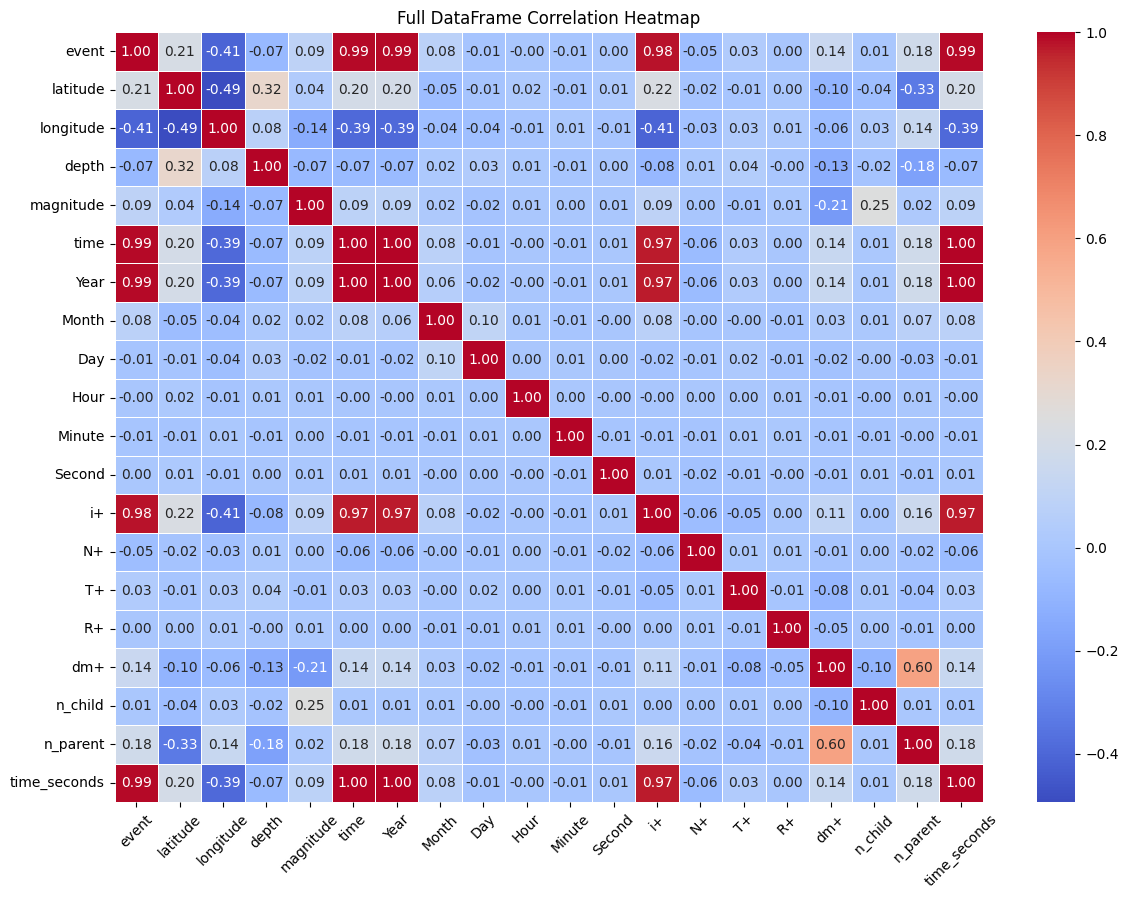

In [23]:

# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation
corr_matrix = df_numeric.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=0.5)

plt.title("Full DataFrame Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


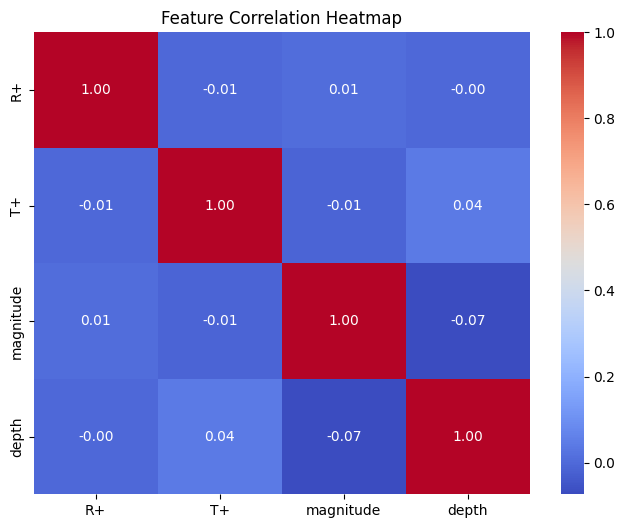

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(features.corr(), 
            annot=True, 
            cmap='coolwarm',
            fmt=".2f")

plt.title("Feature Correlation Heatmap")
plt.show()


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


## Determine eps Using k-distance Plot

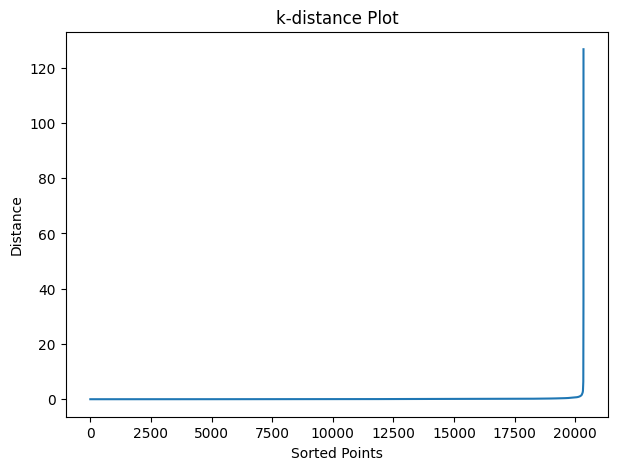

In [26]:
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, -1])

plt.figure(figsize=(7,5))
plt.plot(distances)
plt.title("k-distance Plot")
plt.xlabel("Sorted Points")
plt.ylabel("Distance")
plt.show()


In [27]:
print(np.isinf(features).sum())
print(np.isnan(features).sum())


R+           0
T+           0
magnitude    0
depth        0
dtype: int64
R+           0
T+           0
magnitude    0
depth        0
dtype: int64


In [ ]:
db = DBSCAN(eps=0.6, min_samples=10)

labels = db.fit_predict(X_scaled)

df['cluster'] = labels


In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Noise points:", n_noise)


## Extract Declustered Catalog

In [ ]:
declustered = []

for cluster_id in df['cluster'].unique():
    
    cluster_events = df[df['cluster'] == cluster_id]
    
    if cluster_id == -1:
        declustered.append(cluster_events)
    else:
        mainshock = cluster_events.loc[
            cluster_events['magnitude'].idxmax()
        ]
        declustered.append(mainshock.to_frame().T)

declustered_df = pd.concat(declustered).reset_index(drop=True)

print("Original:", len(df))
print("Declustered:", len(declustered_df))


# Compare Magnitude Distribution

In [ ]:
plt.figure(figsize=(8,5))

plt.hist(df['magnitude'], bins=30, alpha=0.5, label="Original")
plt.hist(declustered_df['magnitude'], bins=30, alpha=0.5, label="Declustered")

plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Magnitude Distribution Comparison")
plt.show()


# Confusion Matrix (With Supervised Labels)

In [ ]:
df['dbscan_label'] = np.where(df['cluster'] == -1, 0, 1)

cm = confusion_matrix(df['supervised_label'], df['dbscan_label'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("DBSCAN")
plt.ylabel("Supervised")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(
    df['supervised_label'],
    df['dbscan_label']
))
